# Exploratory Data Analysis on Austin Animal Center Intakes

## Table of Contents: 
 
   * [General Information](#general-information) 
   <br/><br/> 
   * [Aged Animals](#aged-animals) 
   <br/><br/> 
   * [Animals Returned](#animals-returned) 
   <br/><br/> 
   * [Location & Time](#location+time) 
   <br/><br/> 
       

## General Information $\;\;\;\;\;\;$ <a class="anchor" id="general-information"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim

In [2]:
df = pd.read_csv('Intakes.csv')
new_df = df.copy() # New dataframe on which feature engineering apply 

In [3]:
df.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [4]:
df.shape

(124120, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124120 entries, 0 to 124119
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         124120 non-null  object
 1   Name              85069 non-null   object
 2   DateTime          124120 non-null  object
 3   MonthYear         124120 non-null  object
 4   Found Location    124120 non-null  object
 5   Intake Type       124120 non-null  object
 6   Intake Condition  124120 non-null  object
 7   Animal Type       124120 non-null  object
 8   Sex upon Intake   124119 non-null  object
 9   Age upon Intake   124120 non-null  object
 10  Breed             124120 non-null  object
 11  Color             124120 non-null  object
dtypes: object(12)
memory usage: 11.4+ MB


In [6]:
df.describe()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
count,124120,85069,124120,124120,124120,124120,124120,124120,124119,124120,124120,124120
unique,110926,19748,87660,87660,53703,6,10,5,5,52,2629,595
top,A721033,Max,09/23/2016 12:00:00 PM,09/23/2016 12:00:00 PM,Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,564,64,64,22859,86455,107952,70447,40316,21794,30985,13034


In [7]:
df['Intake Type'].unique()

array(['Stray', 'Owner Surrender', 'Public Assist', 'Wildlife',
       'Euthanasia Request', 'Abandoned'], dtype=object)

In [8]:
df['Intake Condition'].unique()

array(['Normal', 'Sick', 'Injured', 'Nursing', 'Aged', 'Other', 'Feral',
       'Medical', 'Pregnant', 'Behavior'], dtype=object)

In [9]:
df['Sex upon Intake'].unique()

array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female',
       'Unknown', nan], dtype=object)

Dog          70447
Cat          46455
Other         6610
Bird           586
Livestock       22
Name: Animal Type, dtype: int64


<AxesSubplot:ylabel='Animal Type'>

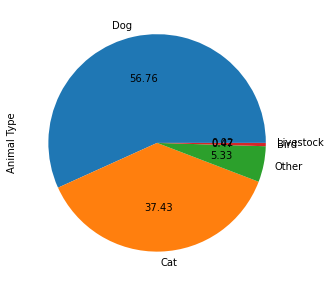

In [10]:
print(df['Animal Type'].value_counts())
plt.figure(figsize=(5,5))
df['Animal Type'].value_counts().plot.pie(autopct='%.2f')

$\;\;\;\;\;\;$ <a class="anchor" id="aged-animals"></a>
## Aged Animals

In [11]:
df['Age upon Intake'].unique()

array(['2 years', '8 years', '11 months', '4 weeks', '4 years', '6 years',
       '5 months', '14 years', '1 month', '2 months', '18 years',
       '4 months', '1 year', '6 months', '3 years', '4 days', '1 day',
       '5 years', '2 weeks', '15 years', '7 years', '3 weeks', '3 months',
       '12 years', '1 week', '9 months', '10 years', '10 months',
       '7 months', '9 years', '8 months', '1 weeks', '5 days', '2 days',
       '11 years', '0 years', '17 years', '3 days', '13 years', '5 weeks',
       '19 years', '6 days', '16 years', '20 years', '-1 years',
       '22 years', '23 years', '-2 years', '21 years', '-3 years',
       '25 years', '24 years'], dtype=object)

In [12]:
# Convert string age values into interger
def age_to_year(age):
    if (age.split(" ")[1] in ['years','year']) & (int(age.split(" ")[0]) < 0): # return negative years to positive years
        return int(age.split(" ")[0]) * -1
    elif age.split(" ")[1] in ['years','year']: # return age in years
        return int(age.split(' ')[0])
    elif age.split(" ")[1] in ['months','month','weeks','week','days','day']: # return age < 1 year to 0
        return 0
    else:
        return None
        
new_df['Age upon Intake'] = df['Age upon Intake'].apply(age_to_year)

In [13]:
new_df['Age upon Intake']

0         2
1         8
2         0
3         0
4         4
         ..
124115    0
124116    0
124117    9
124118    1
124119    4
Name: Age upon Intake, Length: 124120, dtype: int64

Text(0.5, 0, 'Age')

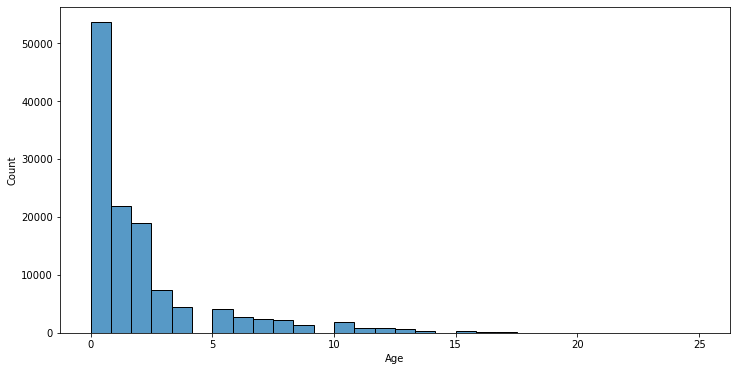

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(new_df['Age upon Intake'],bins=30)
plt.xlabel("Age")

In [15]:
print("\n")
print("The number of animals which are less than 1 year old: " + str(new_df['Age upon Intake'][new_df['Age upon Intake']==0].count()))
print("\n")
print("The number of animals which are less than 2 years old: " + str(new_df['Age upon Intake'][new_df['Age upon Intake']<=2].count()))
print("\n")
print("The average age of animals in the center: " + str(np.mean(new_df['Age upon Intake'])))
print("\n")



The number of animals which are less than 1 year old: 53599


The number of animals which are less than 2 years old: 94429


The average age of animals in the center: 1.9627940702545923




Text(0.5, 1.0, 'Intake Condition vs. Age')

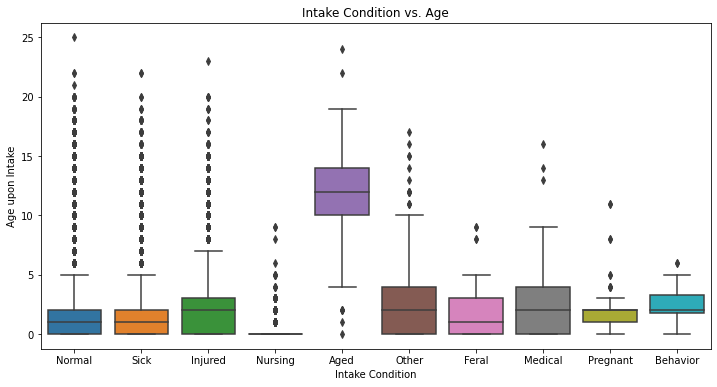

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(data=new_df, x='Intake Condition', y='Age upon Intake')
plt.title("Intake Condition vs. Age")

Text(0.5, 1.0, 'Intake Type vs. Age')

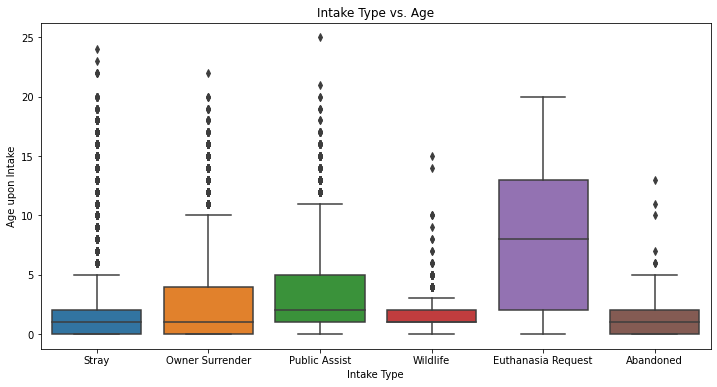

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(data=new_df, x='Intake Type', y='Age upon Intake')
plt.title("Intake Type vs. Age")

Text(0.5, 1.0, 'Intake Type of Animals')

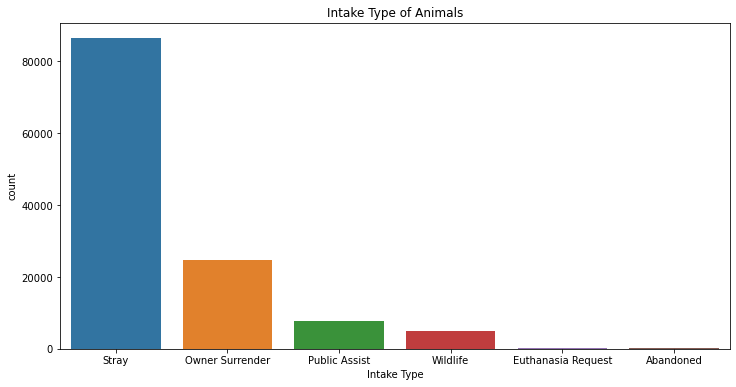

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Intake Type'])
plt.title("Intake Type of Animals")

Text(0.5, 1.0, 'Intake Type of Animals Age of 10 or more')

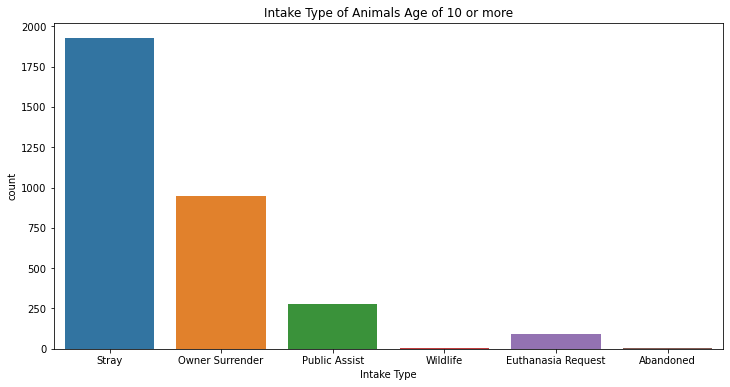

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x=new_df[new_df['Age upon Intake']>10]['Intake Type'],order=['Stray', 'Owner Surrender', 'Public Assist', 'Wildlife',
       'Euthanasia Request', 'Abandoned'])
plt.title("Intake Type of Animals Age of 10 or more")

In [20]:
euthanasia_request = new_df[new_df['Intake Type']=='Euthanasia Request']['Intake Type']
euthanasia_request_aged =new_df[(new_df['Intake Type']=='Euthanasia Request')&(new_df['Age upon Intake']>10)]['Intake Type']

print("\n")
print("The percentage of euthanasia request for entire animals in the center: " + str(euthanasia_request.count() / new_df['Intake Type'].count()) )
print("\n")
print("The percentage of euthanasia request for aged animals in the center: " + str(euthanasia_request_aged.count() /new_df[new_df['Age upon Intake']>10]['Intake Type'].count()))
print("\n")



The percentage of euthanasia request for entire animals in the center: 0.0020705768611021594


The percentage of euthanasia request for aged animals in the center: 0.02776920703486578




In [21]:
owner_surrender = new_df[new_df['Intake Type']=='Owner Surrender']['Intake Type']
owner_surrender_aged =new_df[(new_df['Intake Type']=='Owner Surrender')&(new_df['Age upon Intake']>10)]['Intake Type']

print("\n")
print("The percentage of owner surrender for entire animals in the center: " + str(owner_surrender.count() / new_df['Intake Type'].count()) )
print("\n")
print("The percentage of owner surrender for aged animals in the center: " + str(owner_surrender_aged.count() /new_df[new_df['Age upon Intake']>10]['Intake Type'].count()) )



The percentage of owner surrender for entire animals in the center: 0.19824363519174992


The percentage of owner surrender for aged animals in the center: 0.2915766738660907


$\;\;\;\;\;\;$ <a class="anchor" id="animals-returned"></a>
## Animals Returned
    - There are animals which have been adopted once but returned to the shelter again.

In [22]:
total_intake = df['Animal ID'].count()
total_animal = df['Animal ID'].nunique()
print("\n")
print('Total number of intakes: ' + str(total_intake))
print("\n")
print('Total number of animals that have been in the shelter: ' + str(total_animal))
print("\n")



Total number of intakes: 124120


Total number of animals that have been in the shelter: 110926




In [23]:
intake_once = df[df.duplicated('Animal ID',keep=False)==False]['Animal ID'].nunique() 
intake_more = df[df.duplicated('Animal ID',keep=False)]['Animal ID'].nunique() 
print("\n")
print('The number of animals that were intaken only once: '+ str(intake_once))
print("\n")
print('The number of animals that were intaken more than once: '+ str(intake_more))
print("\n")



The number of animals that were intaken only once: 100823


The number of animals that were intaken more than once: 10103




In [24]:
print("\n")
print('The percentage of animals that have come back to the shelter: ' + str(round(intake_more/total_animal* 100,2)) + '%')
print("\n")



The percentage of animals that have come back to the shelter: 9.11%




In [25]:
# data of intakes that are not animal's first time
returned = new_df[new_df.duplicated('Animal ID')] 
returned.shape

(13194, 12)

Text(0.5, 1.0, 'Count of Intakes on Age of Animals that have been Returned')

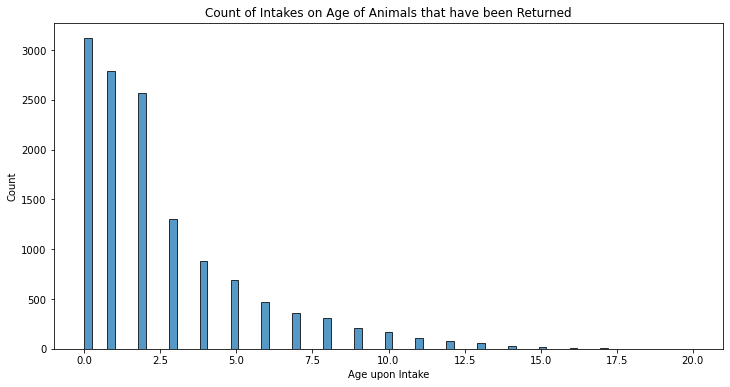

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(returned['Age upon Intake'])
plt.title('Count of Intakes on Age of Animals that have been Returned')

Text(0.5, 1.0, 'Intake Condition of Returned')

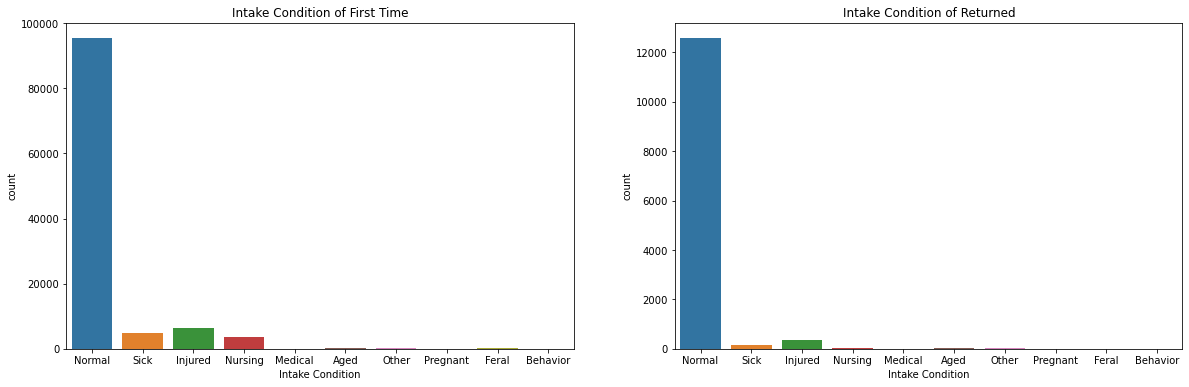

In [27]:
fig, ax =plt.subplots(1,2,figsize=(20,6))

sns.countplot(x=new_df[new_df.duplicated('Animal ID')==False]['Intake Condition'], ax=ax[0], order=['Normal', 'Sick', 'Injured', 'Nursing', 'Medical', 'Aged', 'Other',
       'Pregnant', 'Feral', 'Behavior'])
ax[0].set_title("Intake Condition of First Time")

sns.countplot(x=returned['Intake Condition'], ax=ax[1], order=['Normal', 'Sick', 'Injured', 'Nursing', 'Medical', 'Aged', 'Other',
       'Pregnant', 'Feral', 'Behavior'])
ax[1].set_title("Intake Condition of Returned")

Text(0.5, 1.0, 'Intake Type of Returned')

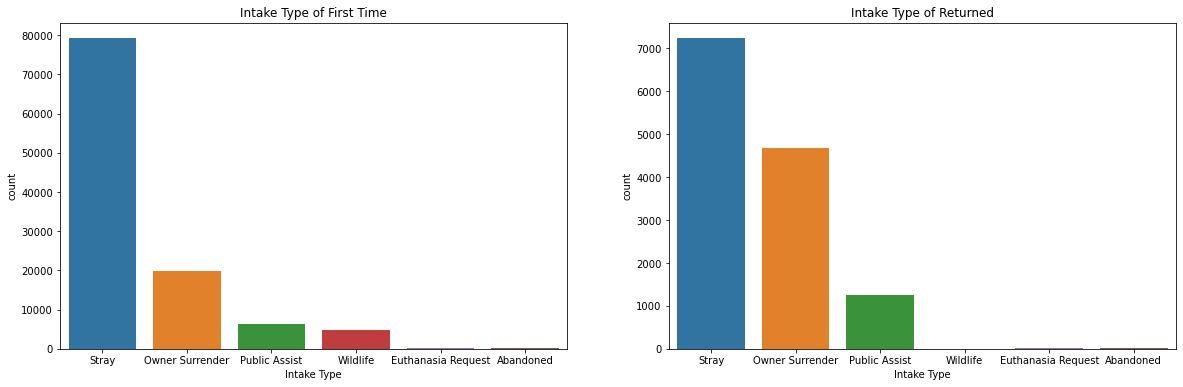

In [28]:
fig, ax =plt.subplots(1,2,figsize=(20,6))

sns.countplot(x=new_df[df.duplicated('Animal ID')==False]['Intake Type'], ax=ax[0], order=['Stray', 'Owner Surrender', 'Public Assist', 'Wildlife',
       'Euthanasia Request', 'Abandoned'])
ax[0].set_title("Intake Type of First Time")

sns.countplot(x=returned['Intake Type'], ax=ax[1], order=['Stray', 'Owner Surrender', 'Public Assist', 'Wildlife',
       'Euthanasia Request', 'Abandoned'])
ax[1].set_title("Intake Type of Returned")

In [29]:
# 첫 번째인 입소 건수 중에 owner surrender가 이유인 비율
first_time_total = new_df[new_df.duplicated('Animal ID')==False]['Intake Type'].count()
first_time_owner_surrender = new_df[new_df.duplicated('Animal ID')==False]['Intake Type'].value_counts()['Owner Surrender']
print("\n")
print("The percentag of owner surrender first time intake: " + str(round(first_time_owner_surrender / first_time_total, 2)))
print("\n")



The percentag of owner surrender first time intake: 0.18




In [30]:
# 첫 번쨰가 아닌 입소 건수 중에 owner surrender가 이유인 비율

returned_total = returned['Intake Type'].count()
returned_owner_surrender = returned['Intake Type'].value_counts()['Owner Surrender']
print("\n")
print("The percentag of owner surrender not first time intake: " + str(round(returned_owner_surrender / returned_total, 2)))
print("\n")



The percentag of owner surrender not first time intake: 0.35




* Insight
</b></b>
 * More than 9 percent of total animals have returned to the animal center.(considered a little high?)
        -> the center might need to reinforce the system to filter the families who would like to adopt animals.
 * Luckily, the proportion of owner surrender of animals returning to the center is two times more than the proportion of owner surrender of first time intake animals.
        -> the condition of animal might be factor of returning.

In [31]:
new_df['Age upon Intake']

0         2
1         8
2         0
3         0
4         4
         ..
124115    0
124116    0
124117    9
124118    1
124119    4
Name: Age upon Intake, Length: 124120, dtype: int64

$\;\;\;\;\;\;$ <a class="anchor" id="location+time"></a>
## Location & Time

In [32]:
# df['Found Location'].isnull().sum()
# df['Found Location'].nunique()

# street_address = df['Found Location'].apply(lambda location: location.replace(" in ",", ")) # Extract street address

# geolocator = Nominatim(user_agent="geoapi", timeout=100)
# full_address = street_address.apply(geolocator.geocode) # Find full address

# zipcode = full_address.apply(lambda address: address.split().[-2]) # Find zipcodes
# zipcode.nunique()

# Map zipcode

In [33]:
new_df = new_df.drop('MonthYear',axis=1)

In [34]:
new_df["DateTime"] = pd.to_datetime(df["DateTime"]).dt.date

In [35]:
new_df['Year'] = pd.to_datetime(df["DateTime"]).dt.year
new_df['Month'] = pd.to_datetime(df["DateTime"]).dt.month

<AxesSubplot:xlabel='Month,Year'>

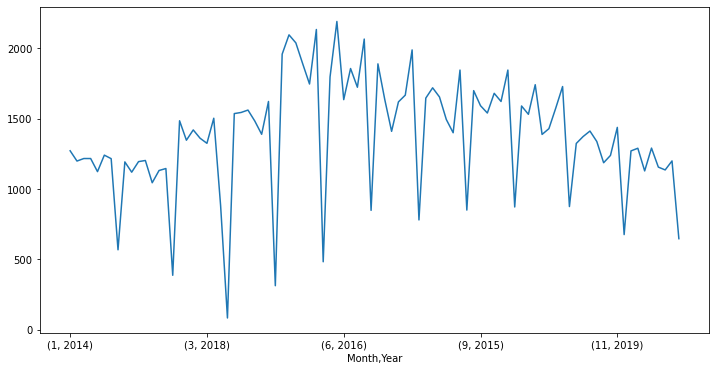

In [36]:
plt.figure(figsize=(12,6))
new_df.groupby(['Month','Year'])['Animal ID'].count().plot()

<AxesSubplot:xlabel='Year', ylabel='count'>

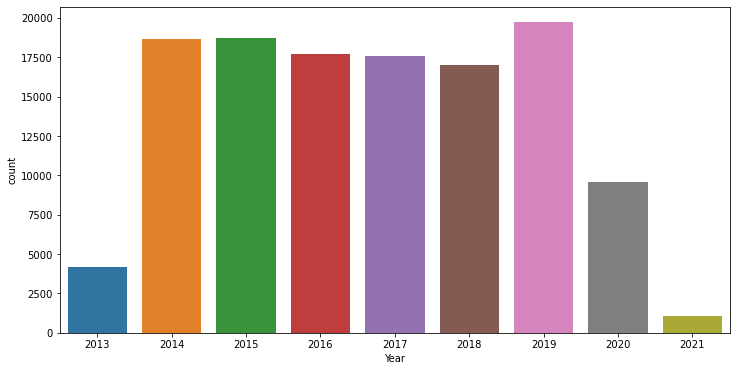

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(data=new_df,x="Year")

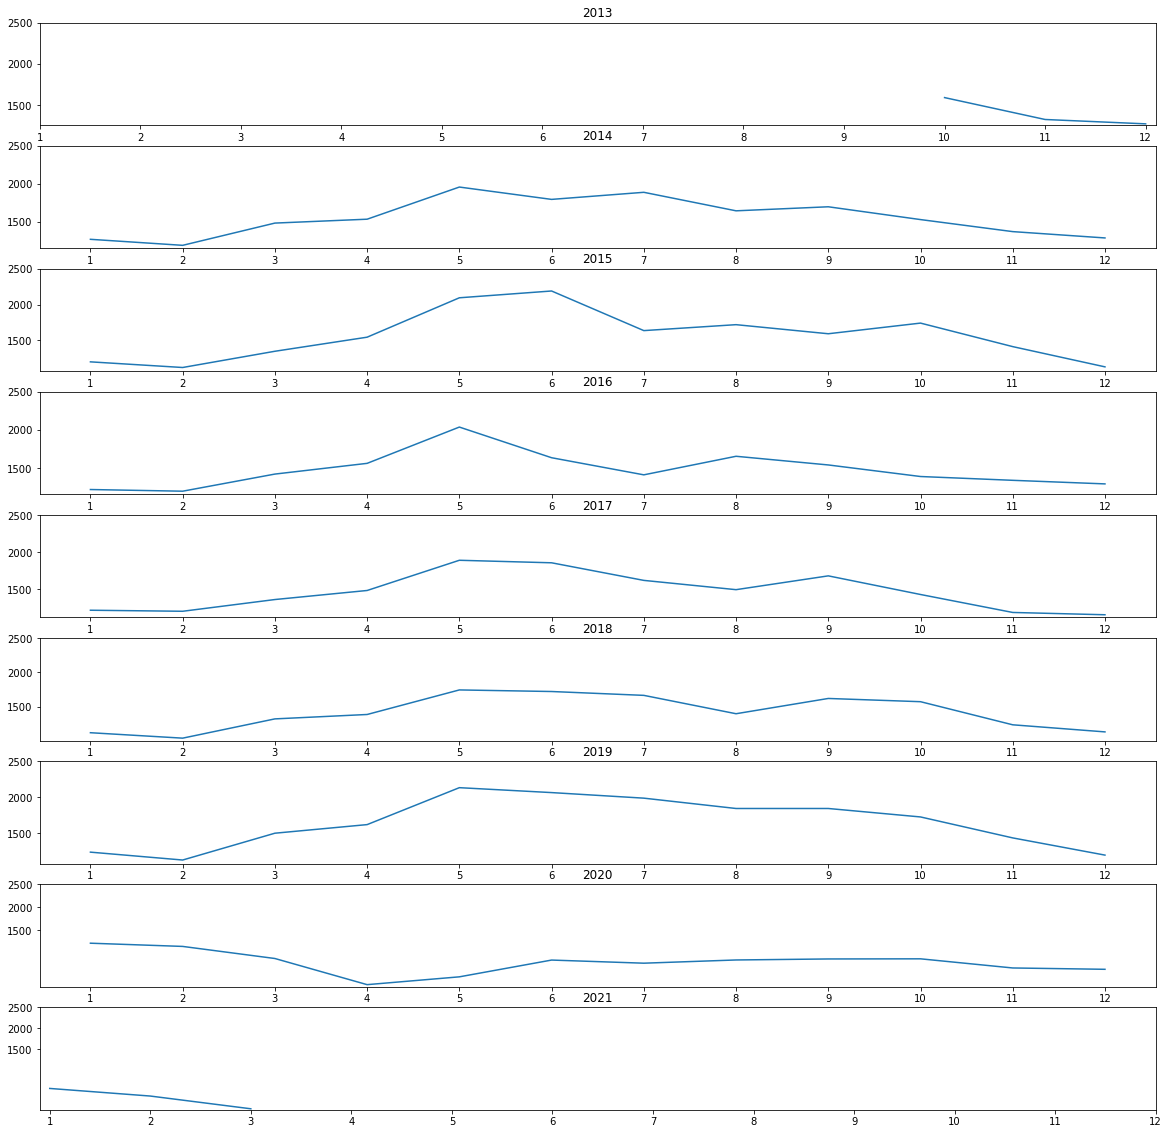

In [38]:
years = sorted(new_df['Year'].unique())

fig, ax = plt.subplots(len(years), 1, figsize=(20,20))

i = 0
for year in sorted(years):
    temp_df = new_df[new_df['Year']==year]
    ax[i].plot(temp_df.groupby('Month')['Animal ID'].count())
    ax[i].set_yticks((1500,2000,2500))
    ax[i].set_xticks(range(1,13))
    ax[i].set_title(year)
    i += 1

* Insight
</b></b>
 * The number of total intakes had decreased steadily from 2104 to 2018, but increased in 2019 sudden manner.
     -> This might need a further research
 * The number of total intakes decreased exponentially in 2020.
         -> Covid-19 can be a possible factor. It doesn't mean that the number of animals in need of help decreased. It possibly means that they downsized the operation size of the center.
 * Almost every year the number of total intakes increases from Jan to May, then decreases May to Sep. Again, increases in a small stemp in Sep and decreases until Dec. 
         -> School season seems to be the most effective factor.

In [39]:
new_df.to_csv("Cleaned_Intakes.csv")